# Libraries

In [55]:
import pandas as pd
import numpy as np

from typing import List

import matplotlib.pyplot as plt
import seaborn as sns

# Helpers

In [267]:
class UnionFind:
    def __init__(self, n):
        self.data = list(range(n))
        self.size = n

    def find(self, index):
        return self.data[index]
    
    def union(self, x, y):
        x, y = self.find(x), self.find(y)
     
        if x == y:
            return
        
        for i in range(self.size):
    	    if self.find(i) == y:
        	    self.data[i] = x

# EDA

In [2]:
data = pd.read_pickle('../data/data.pickle')

In [3]:
symbols = data.symbol.unique()

## Profile

In [6]:
data.reset_index().groupby(['symbol']).Date.agg(['min', 'max'])

,min,max
symbol,,
ADANIENT.NS,2002-07-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
APOLLOHOSP.NS,2002-07-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
BAJAJ-AUTO.NS,2002-07-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
BAJAJFINSV.NS,2002-08-12 00:00:00+05:30,2024-01-05 00:00:00+05:30
BAJFINANCE.NS,2002-07-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
BHARTIARTL.NS,2002-07-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
BRITANNIA.NS,1996-01-02 00:00:00+05:30,2024-01-05 00:00:00+05:30
CIPLA.NS,1996-01-01 00:00:00+05:30,2024-01-05 00:00:00+05:30
COALINDIA.NS,2010-11-04 00:00:00+05:30,2024-01-05 00:00:00+05:30


In [41]:
data.reset_index().pivot(index='Date', columns=['symbol'], values='Close').describe()

symbol,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
count,5347.000000,5345.000000,5348.000000,5314.000000,5345.000000,5345.000000,7039.000000,7031.000000,3248.000000,1516.000000,...,4734.000000,7030.000000,7040.000000,7040.000000,7043.000000,5316.000000,4282.000000,7043.000000,5315.000000,7043.000000
mean,343.332496,1175.632155,1515.380525,766.428656,1484.874249,332.873681,933.892935,336.674964,151.771707,550.264929,...,97.023131,74.769009,589.354413,162.484530,31.361866,1047.425991,454.030250,452.863219,2587.198227,150.233263
std,779.213611,1389.640540,1266.630285,782.676560,2323.751431,203.365185,1361.572197,303.878950,41.077599,101.749369,...,35.135761,51.232665,739.765343,228.003350,30.506494,1085.463248,349.093817,763.520400,2282.415720,137.998153
min,-0.011034,38.967304,57.423424,8.747517,2.967921,8.889030,6.708542,4.093373,76.384773,338.777313,...,33.972691,3.466599,7.799748,7.859627,1.865023,25.135056,39.129543,1.240610,234.956573,0.623853
25%,18.199061,219.468155,359.246086,78.428286,28.055820,255.635254,48.839878,75.924889,125.023434,475.920868,...,80.192703,16.039630,41.085464,24.280624,5.173441,171.459126,169.953205,4.594770,779.231232,48.672480
50%,49.052330,791.314514,1332.266296,528.100250,120.308334,307.898651,136.181351,262.576721,148.802826,563.239899,...,92.997253,84.915970,385.849075,72.262867,26.152744,584.738007,365.453995,67.926422,1785.572998,117.610405
75%,117.838341,1311.997437,2308.403015,1178.489777,2187.792236,370.404907,1449.106384,540.728577,167.961845,636.265701,...,105.730042,114.386881,589.073410,141.004631,40.254333,1675.566528,601.379913,398.321945,3920.077515,201.572380
max,4163.219727,5768.299805,6986.500000,3202.091064,8168.549805,1047.900024,5361.299805,1300.150024,392.649994,754.393555,...,317.100006,216.449997,2831.846680,1125.550049,139.850006,3861.000000,1643.528198,3719.699951,10503.049805,712.624756


## Timeseries Plot

<AxesSubplot:xlabel='Date', ylabel='Close'>

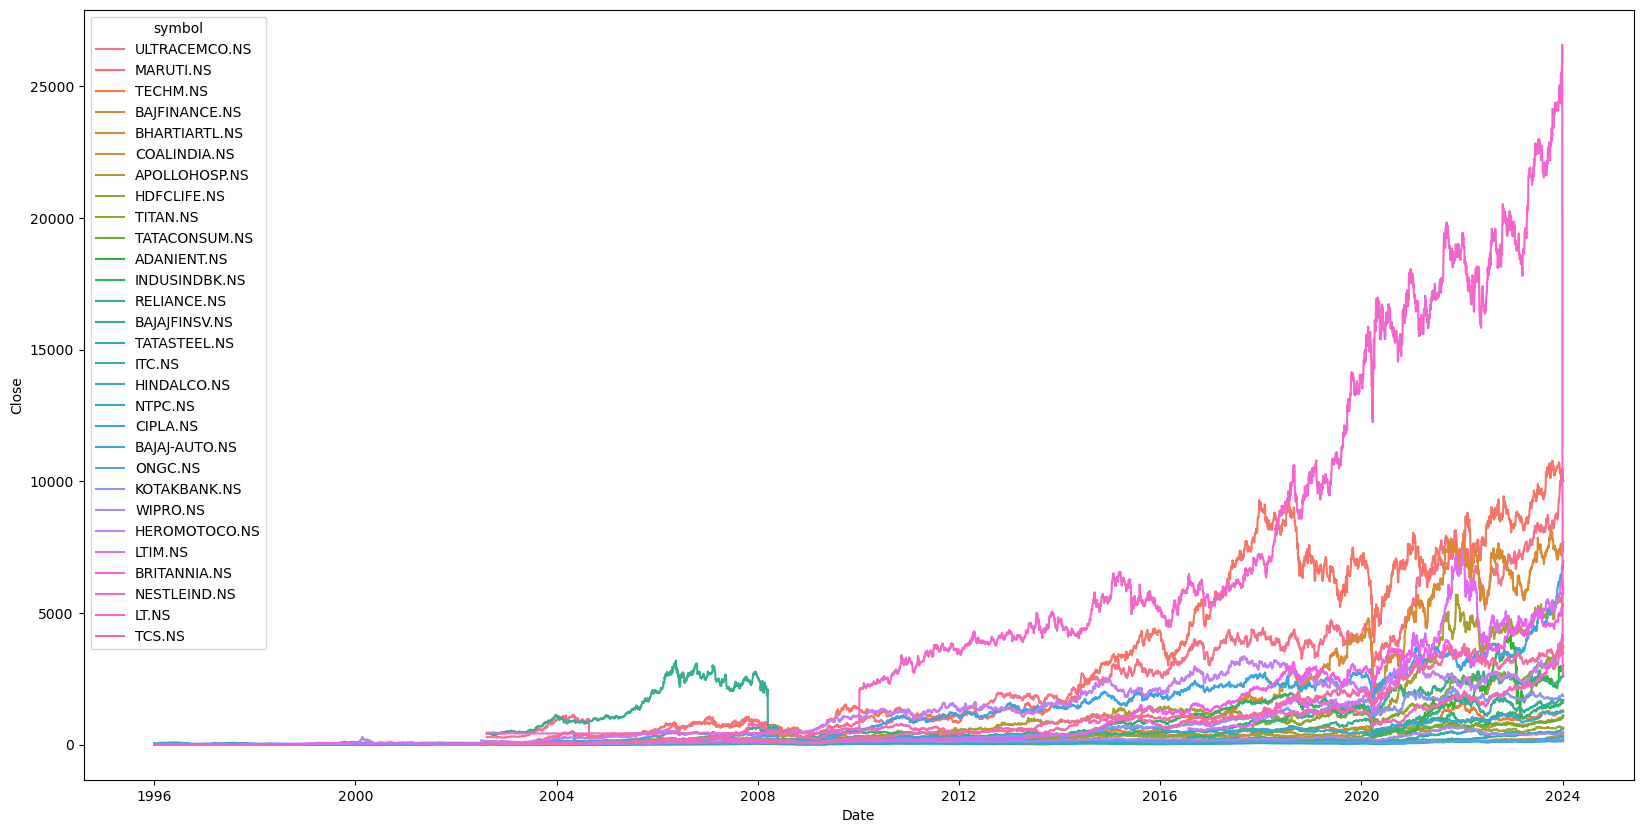

In [4]:
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data.reset_index(),
    x='Date',
    y='Close',
    hue='symbol',
)

## Correlation Plot

In [8]:
pivot_data = data.reset_index().pivot(index='Date', columns=['symbol'], values='Close')
pivot_data

symbol,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.425351,NaN,NaN,...,NaN,5.722966,10.441107,16.508289,5.308656,NaN,NaN,5.188006,NaN,0.910128
1996-01-02 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,7.511677,7.331189,NaN,NaN,...,NaN,5.810907,10.359913,16.235180,5.210075,NaN,NaN,5.190262,NaN,0.839340
1996-01-03 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,7.417193,7.279624,NaN,NaN,...,NaN,5.750023,10.438572,16.353922,5.211407,NaN,NaN,5.142892,NaN,0.869678
1996-01-04 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,7.417193,7.203398,NaN,NaN,...,NaN,5.751715,10.342155,16.324242,5.046219,NaN,NaN,5.059433,NaN,0.869678
1996-01-05 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,7.421914,7.185463,NaN,NaN,...,NaN,5.753408,10.271106,16.255962,4.946308,NaN,NaN,4.921840,NaN,0.869678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 00:00:00+05:30,2917.199951,5750.049805,6701.100098,1676.400024,7299.049805,1013.049988,5319.799805,1251.000000,381.799988,648.700012,...,309.750000,205.350006,2590.250000,1080.099976,139.850006,3811.100098,1297.150024,3677.149902,10464.000000,477.149994
2024-01-02 00:00:00+05:30,2932.399902,5746.350098,6665.049805,1686.199951,7430.049805,1021.700012,5288.850098,1281.550049,392.649994,645.500000,...,306.000000,207.050003,2611.699951,1097.750000,139.600006,3783.199951,1278.099976,3698.250000,10204.700195,469.200012
2024-01-03 00:00:00+05:30,3003.000000,5768.299805,6986.500000,1677.650024,7384.799805,1035.199951,5253.799805,1300.150024,384.549988,637.200012,...,306.200012,208.250000,2583.300049,1084.949951,135.350006,3691.750000,1244.199951,3693.050049,10111.549805,455.899994


### all

In [9]:
corr = pivot_data.dropna().corr()
corr

symbol,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
symbol,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,1.000000,0.890362,0.745715,0.874913,0.853030,0.872926,0.773025,0.895471,0.587924,0.446545,...,0.732463,0.560391,0.841693,0.871562,0.846491,0.817130,0.741288,0.895506,0.822749,0.620283
APOLLOHOSP.NS,0.890362,1.000000,0.834031,0.951284,0.955998,0.924006,0.841514,0.921647,0.508920,0.633330,...,0.719033,0.574857,0.909679,0.965697,0.936208,0.951770,0.927160,0.955979,0.953426,0.822273
BAJAJ-AUTO.NS,0.745715,0.834031,1.000000,0.754356,0.797556,0.872760,0.861436,0.855246,0.725191,0.576584,...,0.877331,0.665613,0.734724,0.857228,0.807448,0.778801,0.701238,0.893617,0.901550,0.543474
BAJAJFINSV.NS,0.874913,0.951284,0.754356,1.000000,0.973605,0.857497,0.748053,0.841367,0.482021,0.615435,...,0.671480,0.570187,0.865368,0.901727,0.910647,0.915450,0.929244,0.923706,0.906159,0.831388
BAJFINANCE.NS,0.853030,0.955998,0.797556,0.973605,1.000000,0.874147,0.806219,0.861025,0.422277,0.711936,...,0.645552,0.482474,0.913837,0.938065,0.881888,0.955596,0.921802,0.926715,0.916904,0.833048
BHARTIARTL.NS,0.872926,0.924006,0.872760,0.857497,0.874147,1.000000,0.870401,0.902511,0.591681,0.592907,...,0.787180,0.565906,0.868002,0.932491,0.834781,0.851931,0.781597,0.941667,0.889597,0.618881
BRITANNIA.NS,0.773025,0.841514,0.861436,0.748053,0.806219,0.870401,1.000000,0.845011,0.565343,0.590055,...,0.737991,0.471596,0.837389,0.857851,0.735706,0.822404,0.698930,0.869069,0.848294,0.529860
CIPLA.NS,0.895471,0.921647,0.855246,0.841367,0.861025,0.902511,0.845011,1.000000,0.568993,0.573648,...,0.750815,0.565702,0.878036,0.942994,0.898041,0.887449,0.806940,0.905661,0.895887,0.712436
COALINDIA.NS,0.587924,0.508920,0.725191,0.482021,0.422277,0.591681,0.565343,0.568993,1.000000,-0.013888,...,0.939042,0.883633,0.302256,0.447274,0.565018,0.358330,0.360477,0.679406,0.587288,0.086771


<AxesSubplot:xlabel='symbol', ylabel='symbol'>

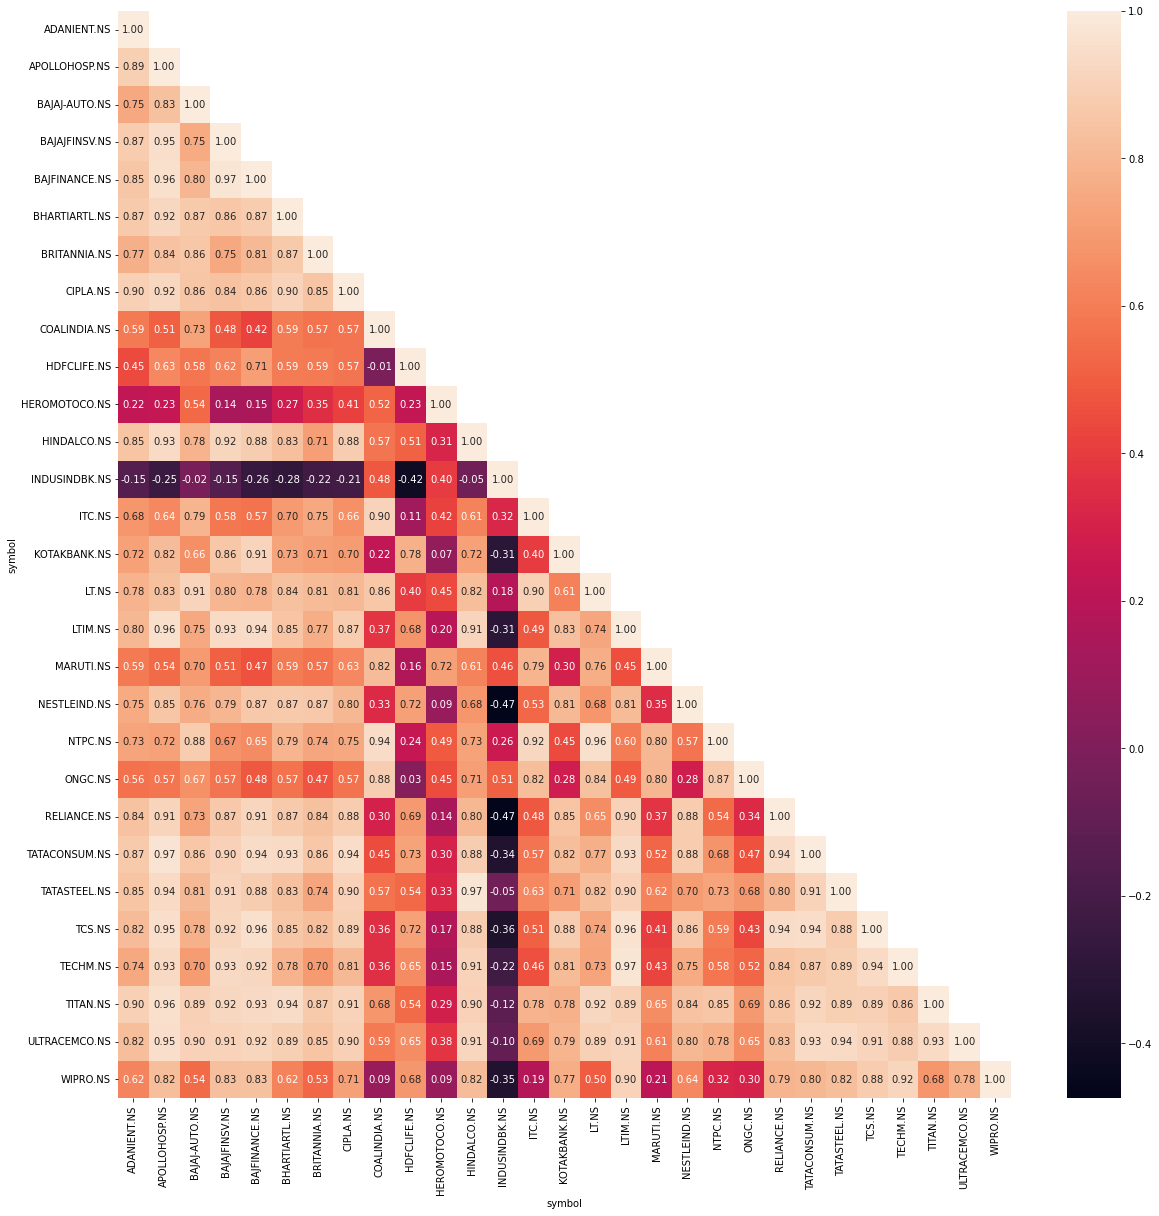

In [208]:
corr = np.tril(corr)
corr = np.where(corr!=0.00, corr, np.nan)
corr = pd.DataFrame(corr, index=pivot_data.columns, columns=pivot_data.columns)

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f'
)

### date 〈 2020

In [209]:
corr_less_than_2020 = pivot_data.dropna().query('Date.dt.strftime("%Y") < "2020"').corr()
corr_less_than_2020

symbol,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
symbol,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,1.000000,0.681654,0.188366,0.723376,0.764982,-0.087690,0.530947,-0.501385,-0.522164,0.309404,...,-0.474646,-0.566578,0.830010,-0.004505,-0.555017,0.680516,0.637131,0.562869,0.135021,0.544249
APOLLOHOSP.NS,0.681654,1.000000,0.308826,0.664471,0.745803,0.175319,0.179818,-0.739554,-0.753355,0.461979,...,-0.383690,-0.578715,0.661163,0.250698,-0.696664,0.532626,0.357047,0.718256,0.296298,0.563233
BAJAJ-AUTO.NS,0.188366,0.308826,1.000000,0.309682,0.247806,0.733123,-0.133917,-0.219352,-0.252262,0.348336,...,0.086334,0.120350,0.258906,0.605505,0.033540,-0.111972,-0.089087,0.307959,0.389550,0.074703
BAJAJFINSV.NS,0.723376,0.664471,0.309682,1.000000,0.973358,0.075572,0.556114,-0.574509,-0.588411,0.567627,...,-0.366968,-0.512742,0.909823,0.156187,-0.740249,0.805739,0.661755,0.858540,0.398762,0.530301
BAJFINANCE.NS,0.764982,0.745803,0.247806,0.973358,1.000000,-0.000008,0.573606,-0.649650,-0.687755,0.586382,...,-0.454410,-0.628325,0.916314,0.122816,-0.829304,0.845039,0.677504,0.869096,0.313587,0.550970
BHARTIARTL.NS,-0.087690,0.175319,0.733123,0.075572,-0.000008,1.000000,-0.462923,-0.025806,-0.087045,0.406955,...,0.336088,0.288755,-0.067304,0.845425,0.243188,-0.400893,-0.502060,0.054930,0.456423,-0.247374
BRITANNIA.NS,0.530947,0.179818,-0.133917,0.556114,0.573606,-0.462923,1.000000,-0.236015,-0.267719,0.173223,...,-0.569631,-0.525220,0.635773,-0.354799,-0.496891,0.659044,0.703719,0.350700,-0.179267,0.196929
CIPLA.NS,-0.501385,-0.739554,-0.219352,-0.574509,-0.649650,-0.025806,-0.236015,1.000000,0.800441,-0.502660,...,0.579944,0.675966,-0.527153,-0.151989,0.787403,-0.420164,-0.409110,-0.691862,0.036797,-0.343130
COALINDIA.NS,-0.522164,-0.753355,-0.252262,-0.588411,-0.687755,-0.087045,-0.267719,0.800441,1.000000,-0.425146,...,0.631754,0.812742,-0.618903,-0.132882,0.806722,-0.499260,-0.361830,-0.587220,0.039332,-0.386761


<AxesSubplot:xlabel='symbol', ylabel='symbol'>

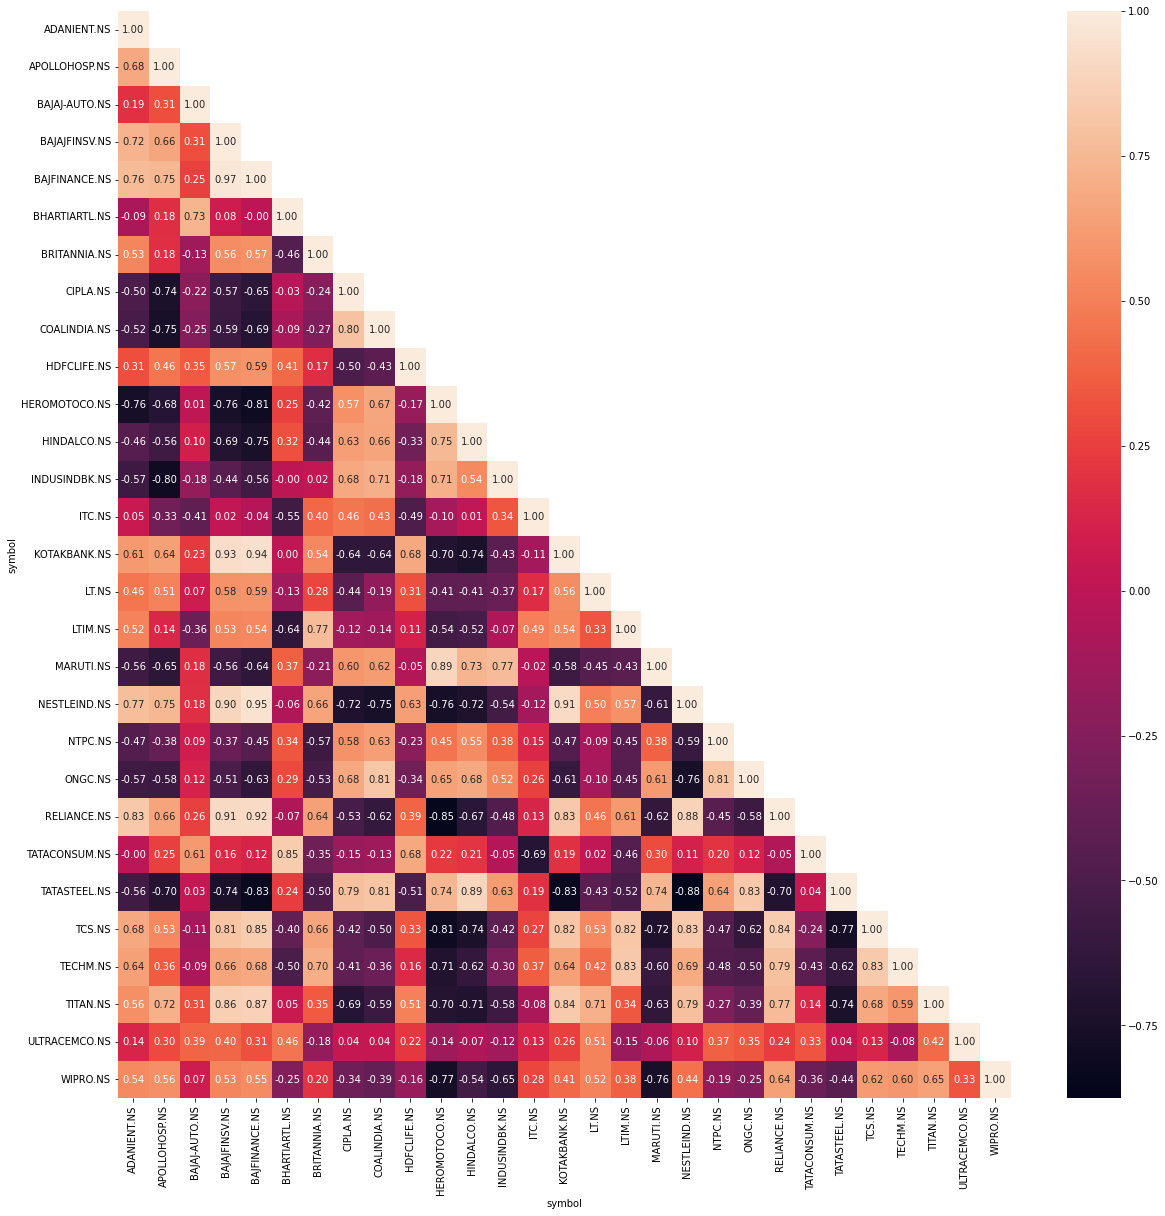

In [210]:
corr_less_than_2020 = np.tril(corr_less_than_2020)
corr_less_than_2020 = np.where(corr_less_than_2020!=0.00, corr_less_than_2020, np.nan)
corr_less_than_2020 = pd.DataFrame(corr_less_than_2020, index=pivot_data.columns, columns=pivot_data.columns)

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_less_than_2020,
    annot=True,
    fmt='.2f'
)

### date >= 2020

In [211]:
corr_greater_than_equal_2020 = pivot_data.dropna().query('Date.dt.strftime("%Y") >= "2020"').corr()
corr_greater_than_equal_2020

symbol,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
symbol,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,1.000000,0.813163,0.607460,0.805431,0.776192,0.809058,0.623115,0.838779,0.732998,-0.011492,...,0.733927,0.743368,0.777937,0.806377,0.771355,0.701816,0.569922,0.831258,0.705932,0.368180
APOLLOHOSP.NS,0.813163,1.000000,0.745664,0.935624,0.937700,0.851821,0.704121,0.868602,0.724921,0.258096,...,0.774212,0.884290,0.824117,0.944017,0.945579,0.929089,0.885533,0.933671,0.931106,0.680414
BAJAJ-AUTO.NS,0.607460,0.745664,1.000000,0.623672,0.706269,0.831414,0.835667,0.803830,0.884491,0.324656,...,0.913108,0.841335,0.588369,0.824039,0.724820,0.689234,0.541978,0.846294,0.856174,0.282858
BAJAJFINSV.NS,0.805431,0.935624,0.623672,1.000000,0.970396,0.780222,0.546139,0.771227,0.636066,0.281361,...,0.676123,0.807638,0.779302,0.878991,0.919065,0.874315,0.888199,0.871715,0.854971,0.722550
BAJFINANCE.NS,0.776192,0.937700,0.706269,0.970396,1.000000,0.775364,0.605147,0.809784,0.653505,0.373668,...,0.703692,0.818791,0.793967,0.916735,0.924865,0.908083,0.883440,0.886619,0.893976,0.717548
BHARTIARTL.NS,0.809058,0.851821,0.831414,0.780222,0.775364,1.000000,0.820799,0.833414,0.923855,0.041565,...,0.937981,0.928341,0.698398,0.825537,0.768240,0.714515,0.632322,0.949758,0.821115,0.278133
BRITANNIA.NS,0.623115,0.704121,0.835667,0.546139,0.605147,0.820799,1.000000,0.753495,0.810800,0.193961,...,0.827872,0.750170,0.642244,0.748721,0.623478,0.612303,0.438224,0.792589,0.772934,0.150697
CIPLA.NS,0.838779,0.868602,0.803830,0.771227,0.809784,0.833414,0.753495,1.000000,0.761275,0.246738,...,0.805225,0.809310,0.831566,0.925277,0.848463,0.842248,0.685924,0.878028,0.834177,0.504425
COALINDIA.NS,0.732998,0.724921,0.884491,0.636066,0.653505,0.923855,0.810800,0.761275,1.000000,-0.030228,...,0.981372,0.889112,0.557312,0.734897,0.658643,0.581155,0.459927,0.891750,0.749064,0.085792


<AxesSubplot:xlabel='symbol', ylabel='symbol'>

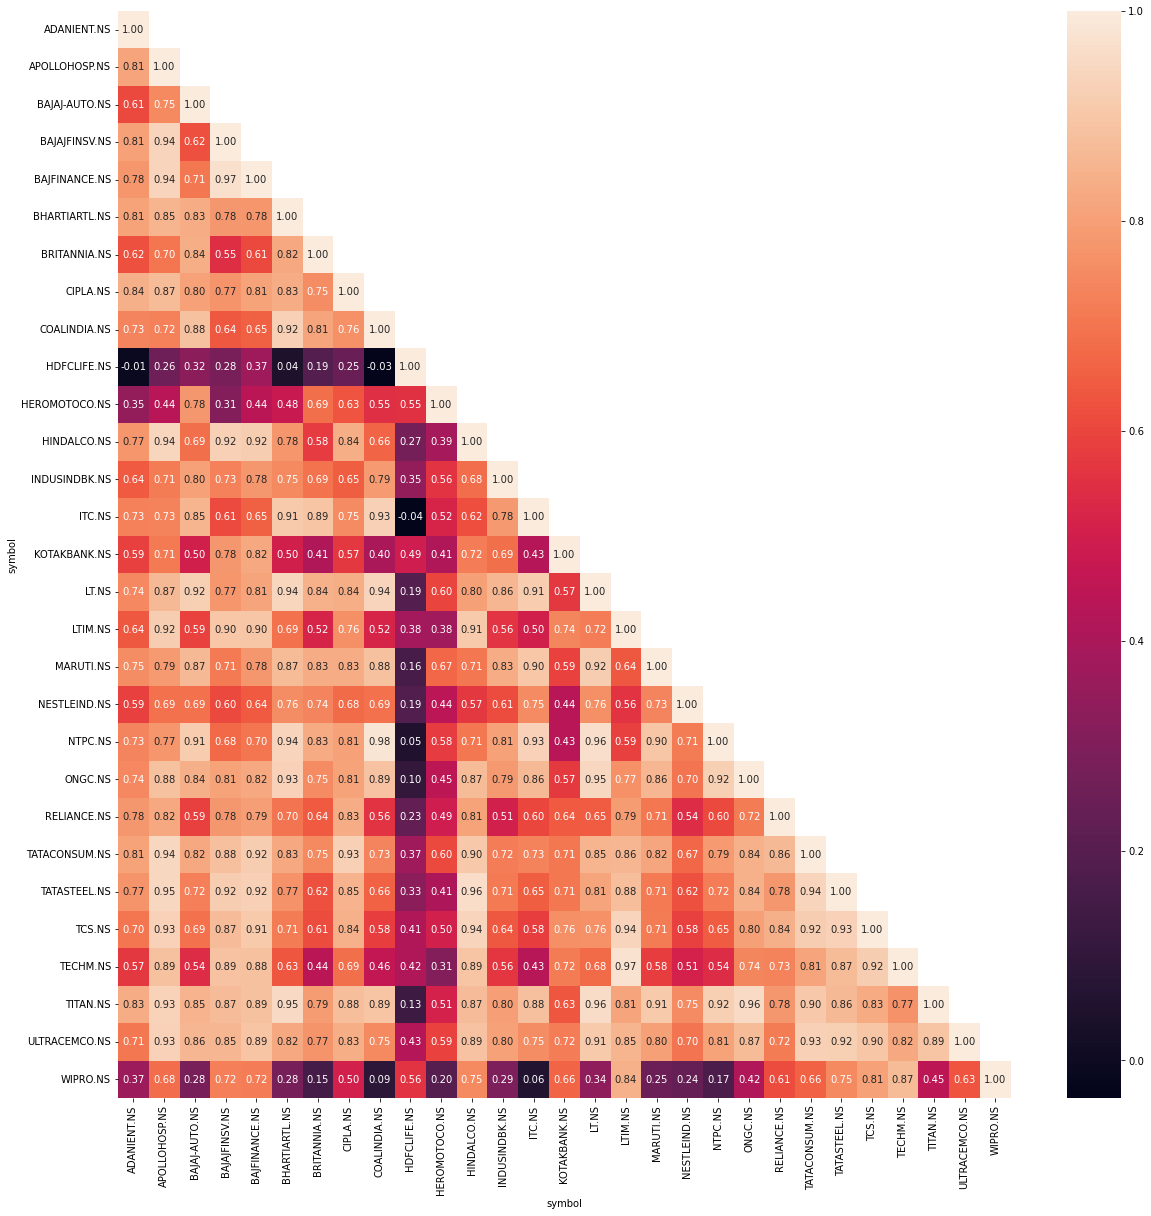

In [212]:
corr_greater_than_equal_2020 = np.tril(corr_greater_than_equal_2020)
corr_greater_than_equal_2020 = np.where(corr_greater_than_equal_2020!=0.00, corr_greater_than_equal_2020, np.nan)
corr_greater_than_equal_2020 = pd.DataFrame(corr_greater_than_equal_2020, index=pivot_data.columns, columns=pivot_data.columns)

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_greater_than_equal_2020,
    annot=True,
    fmt='.2f'
)

# Clustering

## all

In [244]:
corr_with_0_diag = corr.values.copy()
np.fill_diagonal(corr_with_0_diag, 0)

similarity_index = np.where(abs(corr_with_0_diag) > 0.8)
union_find = UnionFind(corr_with_0_diag.shape[0])
for i, j in zip(*similarity_index):
    union_find.union(i, j)
union_set = np.array(union_find.data)
union_group = np.unique(union_set[union_set > 0])
union_group = [np.where(union_set==group) for group in union_group]

In [245]:
for i, union_set_list in enumerate(union_group):
    print(f'cluster {i+1}:', sorted(pivot_data.columns[union_set_list]))

cluster 1: ['HDFCLIFE.NS']
cluster 2: ['HEROMOTOCO.NS']
cluster 3: ['INDUSINDBK.NS']
cluster 4: ['ADANIENT.NS', 'APOLLOHOSP.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'HINDALCO.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'LTIM.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'TATACONSUM.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']


## date 〈 2020

In [246]:
corr_less_than_2020_with_0_diag = corr_less_than_2020.values.copy()
np.fill_diagonal(corr_less_than_2020_with_0_diag, 0)

similarity_index = np.where(abs(corr_less_than_2020_with_0_diag) > 0.8)
union_find = UnionFind(corr_less_than_2020_with_0_diag.shape[0])
for i, j in zip(*similarity_index):
    union_find.union(i, j)
union_set = np.array(union_find.data)
union_group = np.unique(union_set[union_set > 0])
union_group = [np.where(union_set==group) for group in union_group]

In [247]:
for i, union_set_list in enumerate(union_group):
    print(f'cluster {i+1}:', sorted(pivot_data.columns[union_set_list]))

cluster 1: ['BAJAJ-AUTO.NS']
cluster 2: ['BRITANNIA.NS']
cluster 3: ['HDFCLIFE.NS']
cluster 4: ['APOLLOHOSP.NS', 'INDUSINDBK.NS']
cluster 5: ['ITC.NS']
cluster 6: ['LT.NS']
cluster 7: ['BHARTIARTL.NS', 'TATACONSUM.NS']
cluster 8: ['ADANIENT.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'CIPLA.NS', 'COALINDIA.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'KOTAKBANK.NS', 'LTIM.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS']
cluster 9: ['ULTRACEMCO.NS']
cluster 10: ['WIPRO.NS']


## date >= 2020

In [242]:
corr_greater_than_equal_2020_with_0_diag = corr_greater_than_equal_2020.values.copy()
np.fill_diagonal(corr_greater_than_equal_2020_with_0_diag, 0)

similarity_index = np.where(abs(corr_greater_than_equal_2020_with_0_diag) > 0.8)
union_find = UnionFind(corr_greater_than_equal_2020_with_0_diag.shape[0])
for i, j in zip(*similarity_index):
    union_find.union(i, j)
union_set = np.array(union_find.data)
union_group = np.unique(union_set[union_set > 0])
union_group = [np.where(union_set==group) for group in union_group]

In [243]:
for i, union_set_list in enumerate(union_group):
    print(f'cluster {i+1}:', sorted(pivot_data.columns[union_set_list]))

cluster 1: ['HDFCLIFE.NS']
cluster 2: ['HEROMOTOCO.NS']
cluster 3: ['NESTLEIND.NS']
cluster 4: ['ADANIENT.NS', 'APOLLOHOSP.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'HINDALCO.NS', 'INDUSINDBK.NS', 'ITC.NS', 'KOTAKBANK.NS', 'LT.NS', 'LTIM.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'TATACONSUM.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']


# Data Cleaning

In [ ]:
data.Close = np.where(data.Close < 0, np.nan, data.Close)
data.query('Close < 0')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,Adj Close
Date,,,,,,,,,
